# AIM OF PROJECT

# The use of machine learning methods in classification of pumpkin seeds

# Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein,
# fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality 
# types of pumpkin seeds, “Ürgüp Sivrisi” and “Çerçevelik”, generally grown in Ürgüp and Karacaören regions in Turkey.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
p_seeds = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [6]:
p_seeds.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Çerçevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Çerçevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Çerçevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,Çerçevelik


In [7]:
p_seeds.shape

(2500, 13)

In [8]:
p_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [9]:
p_seeds.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


# Encoding Categorical Data 

In [15]:
seeds = pd.get_dummies(p_seeds, drop_first=True)

In [16]:
seeds.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class_Ürgüp Sivrisi
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


In [20]:
x = seeds.drop('Class_Ürgüp Sivrisi', axis = 1)
y = seeds['Class_Ürgüp Sivrisi']


In [33]:
# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [34]:
# Transforming the independent variables using MinMaxScaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
x_train

array([[0.22145879, 0.1718553 , 0.17089287, ..., 0.82233766, 0.19703647,
        0.67877004],
       [0.25802448, 0.25807819, 0.25458449, ..., 0.66857143, 0.29123058,
        0.56100752],
       [0.14293451, 0.21962617, 0.33395235, ..., 0.46      , 0.62608791,
        0.24566569],
       ...,
       [0.63839341, 0.73183591, 0.72716987, ..., 0.36623377, 0.60036356,
        0.26005888],
       [0.52853839, 0.48659049, 0.46289879, ..., 0.69116883, 0.31734053,
        0.53091266],
       [0.21644948, 0.15551005, 0.07426635, ..., 0.85974026, 0.04797841,
        0.90480864]])

# Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lor = LogisticRegression()

In [36]:
lor.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred1 = lor.predict(x_test)

In [38]:
y_pred1

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [39]:
accuracy_score(y_test,y_pred1)

0.86

# Support Vector Classifier SVC

In [40]:
from sklearn import svm

In [41]:
svm = svm.SVC()

In [42]:
svm.fit(x_train,y_train)

SVC()

In [43]:
y_pred2 = svm.predict(x_test)
accuracy_score(y_test,y_pred2)

0.872

# K-neighbours Classifier 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred3 = knn.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred3)

0.858

# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()

In [51]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred4 = rfc.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.88

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred5 = dtc.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred5)

0.838

# Visualizing our model performance to determine the best 

In [59]:
final_score = pd.DataFrame({'Models' : ['LOR','SVC','KNN','RFC','DTc'], 
                            'ACC': [accuracy_score(y_test,y_pred1),
                                   accuracy_score(y_test,y_pred2),
                                   accuracy_score(y_test,y_pred3),
                                   accuracy_score(y_test,y_pred4),
                                   accuracy_score(y_test,y_pred5)]})

In [60]:
final_score

,Models,ACC
0,LOR,0.860
1,SVC,0.872
2,KNN,0.858
3,RFC,0.880
4,DTc,0.838


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

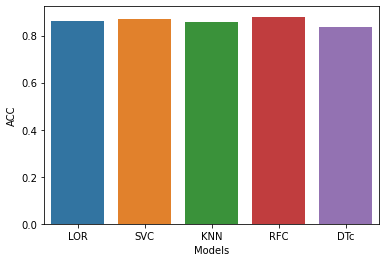

In [61]:
sns.barplot(final_score['Models'],final_score['ACC'])

# This shows that Random forest classifier is the most accurate model for our prediction with 88% accuracy